# Processamento de Imagens Digitais 
## Dept. de Estatística, Mat. Aplicada e Computação (DEMAC)
#### Prof. Daniel Carlos Guimarães Pedronette

# Relatório da lista de exercícios N° 1
-------------------------------
**Nome:** Álvaro Leandro Cavalcante Carneiro 


**Linguagem utilizada:** Python 3.6



## Importando as bibliotecas 
Importando as bibliotecas que serão utilizadas para desenvolver as atividades.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from skimage import data
from PIL import Image
import math

In /home/alvaro/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/alvaro/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/alvaro/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/alvaro/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/alvaro/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

## Carregamento das imagens
As imagens utilizadas serão carregadas da biblioteca *SkImage* [https://scikit-image.org/docs/dev/api/skimage.data.html], como é possível ver no exemplo abaixo.

Existem diversas imagens com diferentes resoluções, sendo que algumas estão em escala de cinza enquanto outras são RGB. Para estes exercícios, foi escolhida a imagem da astronauta. 

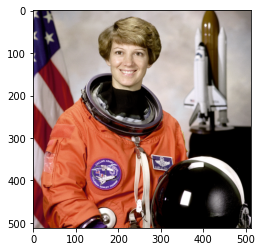

In [2]:
image = data.astronaut()
plt.imshow(image, cmap='gray')

## Conversão para escala de cinza
Para fins de simplicidade as imagens serão manipuladas em escala de cinza, por isso é preciso convertê-las a partir do RGB. A tentativa inicial foi fazer uma média simples das matrizes da imagem, como é possível ver abaixo.

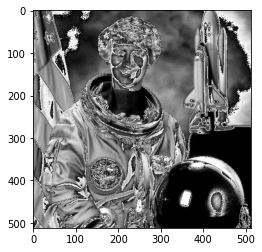

In [3]:
image_r = image[:,:,0]
image_g = image[:,:,1]
image_b = image[:,:,2]

# o método ceil do numpy impede que os valores sejam contínuos na imagem.
gray_image = np.ceil((image_r + image_g + image_b) / 3)
plt.imshow(gray_image, cmap='gray')

Apesar de obter sucesso na tarefa é notório a distorção gerada na visualização da figura. Ao pesquisar sobre o tema, verifiquei que a média não é a melhor forma de realizar essa conversão para escala de cinza, pois o olho humano enxerga os valores de R, G e B de forma diferente, gerando as distorções observadas [http://poynton.ca/PDFs/ColorFAQ.pdf].

Sendo assim, a conversão para escala de cinza de forma eficiente se dá através da multiplicação e soma do valor de intensidade dos pixels de cada uma das matrizes por parâmetros para R, G e B.

Para realizar a conversão para escala de cinza com esse novo método, foi criado a seguinte função.

In [4]:
def convert_to_gray(image, luma=False):
    if luma:
        params = [0.299, 0.589, 0.114]
    else:
        params = [0.2125, 0.7154, 0.0721]

    gray_image = np.ceil(np.dot(image[...,:3], params))
    # impedir que os valores passem de 255
    gray_image[gray_image > 255] = 255
    
    return gray_image

O valor dos parâmetros a serem multiplicados seguem algumas convenções, sendo uma delas bastante conhecida como "luma". Uma vez escolhido os parâmetros, é utilizado a função *dot* do numpy para obter o produto escalar da multiplicação e soma de cada canal de cor pelos seus respectivos parâmetros. Por fim, a imagem recebe uma normalização que satura os valores em 255 para todos os pixels que excedem essa margem do domínio. Por se tratar de uma operação de multiplicação e soma o domínio negativo não é excedido.

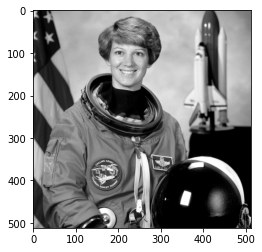

In [5]:
gray_image = convert_to_gray(image)
plt.imshow(gray_image, cmap='gray')

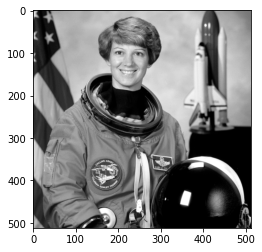

In [6]:
gray_image = convert_to_gray(image, True)
plt.imshow(gray_image, cmap='gray')

As diferenças entre cada um dos parâmetros é quase imperceptível, destacando uma intensidade um pouco maior com os parâmetros do "luma", gerando uma sensação de brilho mais elevado.

## Exercício 1
Para o primeiro exercício, foi carregado uma outra imagem aleatória do *SkImage* com as mesmas dimensões da imagem inicial. Em seguida, foi criado o método *generate_gradient* responsável por preencher as posições da matriz e gerar o gradiente desejado.

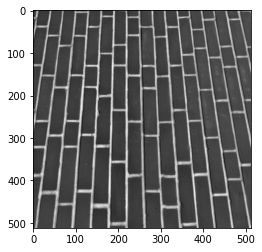

In [7]:
image2 = data.brick()
plt.imshow(image2, cmap='gray')

In [8]:
def generate_gradient(image, horizontal=True):
    pixel_progress = image.shape[0] // 256
    
    count = 0 
    pixel_value = 0 
    
    for i in range(image.shape[0]):
        if (count / pixel_progress).is_integer():
            pass
        else:
            pixel_value += 1
            
        if horizontal:
            image[:,count] = pixel_value
        else:
            image[count] = pixel_value
        count += 1    
    
    return image

A primeira linha do método é uma fórmula simples que vai calcular a progressão dos valores de intensidade pela imagem para gerar o efeito de degradê. Como uma imagem pode ter diferentes tamanhos espaciais, essa fórmula é um pré requisito para garantir que o efeito desejado será atingido. 

Por exemplo, dado um progresso de ordem 2, a cada 2 pixels o valor da intensidade é incrementado por 1. Com isso, garantimos que toda a imagem será preenchida e nenhuma normalização deverá ser realizada. 

Um outro parâmetro do método é o que vai controlar se o degradê será realizado na horizontal ou vertical.

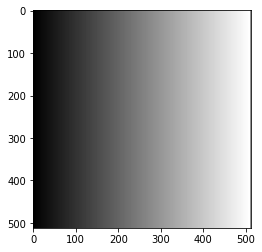

In [9]:
horiz_gradient = generate_gradient(image2)
plt.imshow(horiz_gradient, cmap='gray')

Uma vez obtido o degradê horizontal, foi criado o método genérico chamado *sum_matrix*. Esse método pode receber uma quantidade N de matrizes e fazer a média dos seus valores de intensidade. Também foi criado o método *normalize_image* que garante que os limites de domínio de intensidade da imagem não sejam excedidos.

In [10]:
def normalize_image(image):
    # Garante que os valores estejam no intervalo especificado
    image[image > 255] = 255
    image[image < 0] = 0
    return image

In [11]:
def sum_matrix(*args):    
    count = 0
    # Faz a soma dos valores das matrizes
    for i in range(len(args) - 1):
        if count == 0:
            summed_image = (args[count] + args[count + 1])
        else:
            summed_image += args[count + 1]
        count += 1
    
    # Faz a média dos valores e garante que sejam discretos.   
    norm_img = np.ceil(summed_image / len(args))         
    # Retorna a versão normalizada da matriz
    return normalize_image(norm_img)

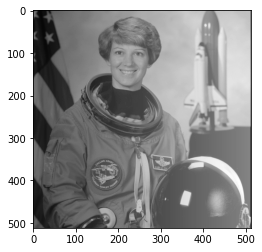

In [12]:
new_image = sum_matrix(gray_image, horiz_gradient)
plt.imshow(new_image, cmap='gray')

Foi utilizado o método de somatória para criar a imagem acima. É notável que o padrão do degradê horizontal se agrega à imagem inicial, gerando um aumento progressivo de intensidade dos pixels.

## Exercício 2
Para esse exercício, os métodos anteriormente criados foram aproveitados, alterando apenas o parâmetro para criação de um degradê em outro sentido.

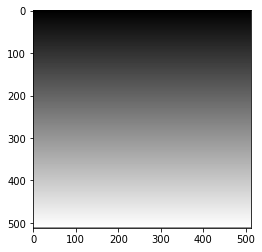

In [13]:
vert_gradient = generate_gradient(image2, False)      
plt.imshow(vert_gradient, cmap='gray')

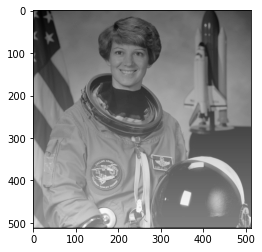

In [14]:
new_image2 = sum_matrix(gray_image, vert_gradient)
plt.imshow(new_image2, cmap='gray')

Os resultados são bastante similares ao que foi observado anteriormente, porém dessa vez o padrão de aumento de intensidade é vertical.

## Exercício 3
O mesmo método de somatória foi utilizado, uma vez que ele aceita qualquer quantidade de matrizes para criar uma média dos valores de intensidade.

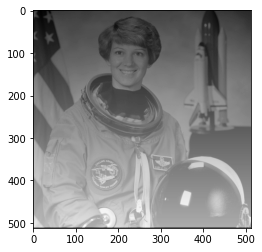

In [15]:
combined_image = sum_matrix(gray_image, horiz_gradient, vert_gradient) 
plt.imshow(combined_image, cmap='gray')

Ao combinar as 3 imagens, é perceptível que a parte inferior é a que possui uma maior intensidade dos pixels.

## Exercício 4
A implementação do exercício 4 seguiu uma lógica bastante similar no que diz respeito ao percorrimento das posições espaciais da imagem para alteração no valor. Dito isso, foi criado uma função genérica *geometric_transformation* para todas as transformações, tendo apenas como alteração as operações matemáticas utilizadas em seu cerne para descobrir os novos valores de X e Y.

In [16]:
def geometric_transformation(image, transform_f):
    new_image = np.zeros((image.shape[0], image.shape[1]))
   
    for row in range(image.shape[0]):
        for column in range(image.shape[1]):   
            x,y = transform_f(row, column)
            
            try:
                if int(x) < 0 or int(y) < 0:
                    raise Exception
                new_image[row][column] = image[int(x)][int(y)]
            except:
                new_image[row][column] = 0

    return new_image

Esse método implementa uma transformação **inversa** ao criar uma nova imagem com as mesmas dimensões da imagem original e percorrer as linhas e colunas dessa nova imagem, buscando para cada pixel o respectivo valor de intensidade na imagem original dado uma função de transformação, chamada no método *transform_f*.

Com isso, a lógica desse método é completamente genérica, sendo necessário apenas alterar a função de transformação pela operação que se quer realizar

O primeiro método de transformação criado é o *translate_image* que irá realizar a translação da imagem ao subtrair as coordenadas espaciais pelos valores dos parâmetros *dx* e *dy*, sendo esses escolhidos de forma impírica. O valor dos parâmetros na translação basicamente dizem respeito a quanto a imagem original será "empurrada" de seu eixo X e Y a partir da origem, porém sem gerar distorções.

In [17]:
def translate_image(row, column, dx=52.5, dy=32.3):
    x = row - dx
    y = column - dy
    return x,y

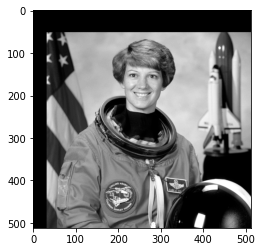

In [18]:
translated_img = geometric_transformation(gray_image, translate_image)
plt.imshow(translated_img, cmap='gray')

Conforme dito, a imagem foi "empurrada" de maneira mais agressiva no eixo X do que no eixo Y, como é possível ver pelo tamanho da faixa preta, devido ao valor dos parâmetros.

A Próxima operação realizada é a escala, usada para diminuir ou aumentar a proporção do objeto na imagem.

In [19]:
def scale_image(row, column, scale_factor=0.5):
    x = row * scale_factor
    y = column * scale_factor
    return x,y

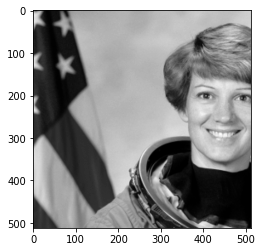

In [20]:
scaled_img = geometric_transformation(gray_image, scale_image)
plt.imshow(scaled_img, cmap='gray')

É interessante observar que a função de escalonamento foi realizada com a operação de multiplicação ao invés da divisão conforme sugerido no slide da aula, pelo fato de ter me baseado no livro: "Processamento Digital de Imagens" de Gonzalez e Woods (3° edição), onde a operação de escalonamento é definida como uma multiplicação.

A diferença de usar a divisão se dá apenas pela alteração na grandeza do parâmetro que controla o quanto a imagem será escalonada (*scale_factor*).

A operação de rotação é um pouco mais complexa, pois é necessário calcular o seno e cosseno do ângulo que se quer rotacionar a imagem para que mesma possa ser projetada no plano espacial, além de envolver a soma e subtração por linha e coluna em cada um dos eixos.

In [21]:
def rotate_image(row, column, angle=0.2):
    x = row * math.cos(angle) - column * math.sin(angle)
    y = row * math.sin(angle) + column * math.cos(angle) 
    return x,y

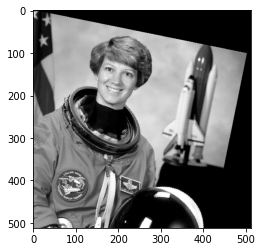

In [22]:
rotated_img = geometric_transformation(gray_image, rotate_image)
plt.imshow(rotated_img, cmap='gray')

Um problema encontrado na abordagem de rotação foi que o valor de X e Y poderiam ser negativos, por conta da subtração realizada. Ao tentar pegar uma intensidade em uma posição negativa, ao invés de gerar uma exceção, a matriz do python inverte a posição para pegar os valores que estão no outro extremo da imagem. 

Por exemplo: Na imagem original, de 512x512 pixels, caso eu selecione o pixel -12 do eixo X, a matriz me retornará o valor de intensidade do pixel 500, pois o sinal negativo inverte a origem.

A consequência disso é que ao invés de valores zerados (cor preta) como vemos nas bordas da imagem, acontecia uma inversão entre o início e o fim da mesma, repetindo a figura em questão, como é possível ver abaixo:

![title](https://live.staticflickr.com/65535/50377608427_20f005ea1b_m.jpg)

Como forma de resolver o problema foi adicionado um bloco de *try/except* que passa o valor de 0 na imagem caso a mesma assuma um valor negativo nas coordenadas.

Por fim, foi realizado a operação de cisalhamento. Para garantir que essa transformação se encaixe na função genérica, foi implementado a versão onde são passados os parâmetros de alteração vertical e horizontal de forma a se completarem para criar o efeito desejado.

In [31]:
def shear_image(row, column, shear_v=0.2, shear_h=0.3):
    x =  row + (column * shear_v)
    y = (row * shear_h) + column
    return x,y        

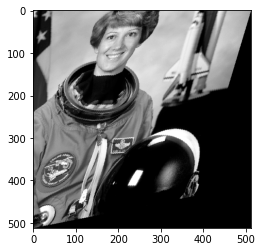

In [32]:
shear_image = geometric_transformation(gray_image, shear_image)
plt.imshow(shear_image, cmap='gray')

## Conclusão
Em apenas poucas linhas de código foi possível implementar diversas operações nas imagens que podem ser utilizadas nos mais diversos campos de aplicação. Embora existam inúmeras bibliotecas capazes de implementar tais transformações de forma ainda mais resumida, é sempre bom ter o controle do que se está criando na aplicação.